In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv(r'C:\Users\sutharsan\Downloads\iNeubytes heart T1\heart.csv')

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### DATA PREPROCESSING 

In [42]:
df.info()    # we have 14 columns and 1025 rows and all are not-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
df.shape  # rows and columns

(1025, 14)

In [44]:
df.isnull().any()   # no missing values

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [45]:
# NO CATEGORICAL VARIABLE

In [46]:
# SCALING - standardscaler  

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# we have to split for that so do later

### EDA

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import seaborn as sns

In [49]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='count'>

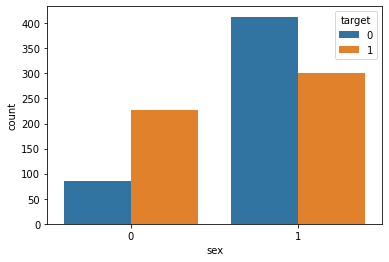

In [50]:
sns.countplot(x='sex',hue='target',data=df)   # 1.male 0-female , here female gets more .

<AxesSubplot:xlabel='age', ylabel='Count'>

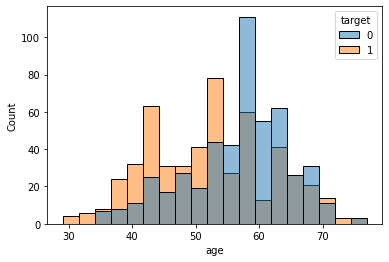

In [51]:
sns.histplot(x='age',hue='target',data=df) # In dataset a lot have from 40 to 55.

<AxesSubplot:>

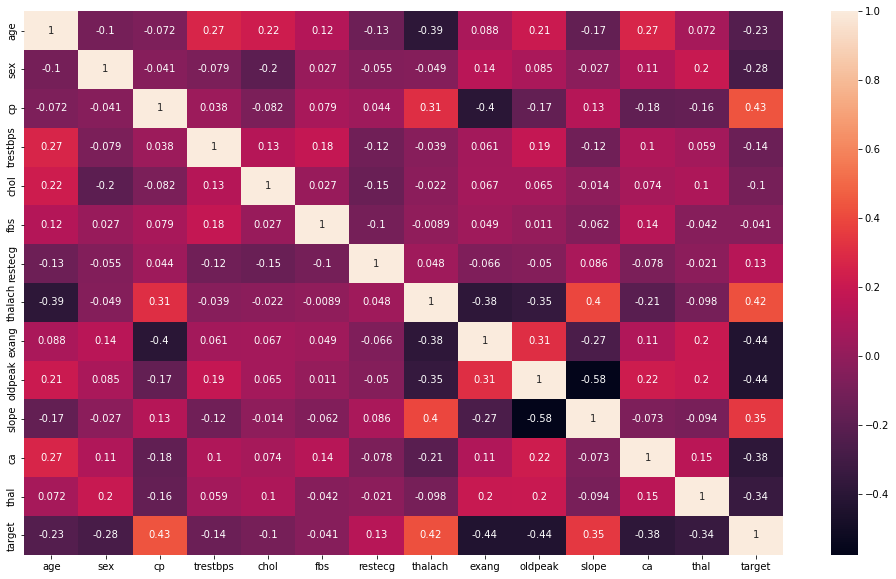

In [52]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot = True)  # in correlation thalach,cp and slope has more correlation with target.

<AxesSubplot:xlabel='cp', ylabel='count'>

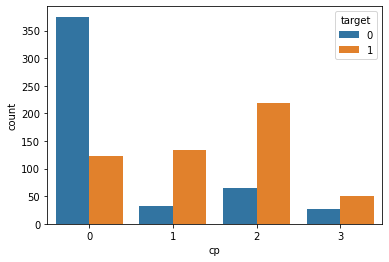

In [53]:
sns.countplot(x='cp',hue='target',data=df)  # in chest pain 1 and 2 have more heart attack.

###




MODEL IMPLEMENTATION

In [54]:
# WE CAN build the model first splitting--> then scaling-->model building-->evaluate-->cross validation

In [55]:
y=df['target']
x=df.drop('target',axis=1)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=42)

In [57]:
# scaling
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [59]:
# KNN, NB, DT for prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)

In [79]:
train_knn = knn.fit(x_train,y_train).score(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test,knn_pred)
knn_recall  = recall_score(y_test,knn_pred)
knn_precision  = precision_score(y_test,knn_pred)
knn_f1score  = f1_score(y_test,knn_pred)                        
roc_auc_knn = roc_auc_score(y_test,knn_pred)

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()  

In [81]:
train_nb = nb.fit(x_train,y_train).score(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_acc = accuracy_score(y_test,nb_pred)
nb_recall  = recall_score(y_test,nb_pred)
nb_precision  = precision_score(y_test,nb_pred)
nb_f1score  = f1_score(y_test,nb_pred)   
roc_auc_nb = roc_auc_score(y_test,nb_pred)

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy")

In [83]:
train_dt = dt.fit(x_train,y_train).score(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test,dt_pred)
dt_recall  = recall_score(y_test,dt_pred)
dt_precision  = precision_score(y_test,dt_pred)
dt_f1score  = f1_score(y_test,dt_pred)  
roc_auc_dt = roc_auc_score(y_test,dt_pred)

### MODEL EVALUATION

In [85]:
from tabulate import tabulate

tab = pd.DataFrame({'train_score' :[train_knn,train_nb,train_dt],
                   'accuracy_score' :[knn_acc,nb_acc,dt_acc],
                   'recall': [knn_recall,nb_recall,dt_recall],
                   'precision' : [knn_precision,nb_precision,dt_precision],
                   'roc_auc_score' : [roc_auc_knn,roc_auc_nb,roc_auc_dt]},
                   index= ['KNN','NB','DT']
                  )

print(tabulate(tab,headers = 'keys',tablefmt='psql'))

+-----+---------------+------------------+----------+-------------+-----------------+
|     |   train_score |   accuracy_score |   recall |   precision |   roc_auc_score |
|-----+---------------+------------------+----------+-------------+-----------------|
| KNN |      0.852162 |         0.811688 | 0.926174 |    0.745946 |        0.815289 |
| NB  |      0.852162 |         0.814935 | 0.892617 |    0.764368 |        0.817378 |
| DT  |      1        |         0.980519 | 0.959732 |    1        |        0.979866 |
+-----+---------------+------------------+----------+-------------+-----------------+


### Cross Validation

In [66]:
model=[]
model.append(('KNN',knn))
model.append(('NB',nb))
model.append(('DT',dt))
from sklearn.model_selection import KFold,cross_val_score


In [67]:
for name,i in model:
    kfold = KFold(n_splits=10,random_state=7,shuffle=True)
    result = cross_val_score(i,x,y,cv=kfold,scoring='accuracy')
    print('%s: accuracy = %.2f%%' %(name,result.mean()*100))   # DT has performed well
    

KNN: accuracy = 74.34%
NB: accuracy = 82.63%
DT: accuracy = 99.71%


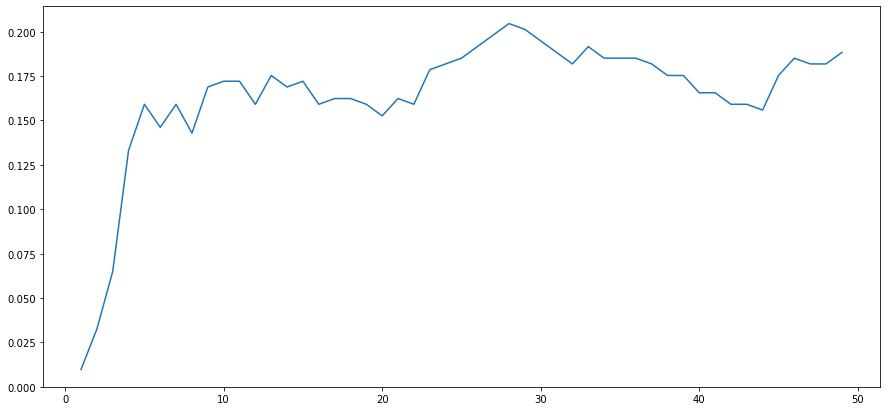

In [68]:
sse = []
k_range = range(1,50)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    sse.append(np.mean(knn_pred != y_test))
plt.figure(figsize=(15,7))
plt.plot(k_range,sse)

In [74]:
# try with k =  1
knn_sse = KNeighborsClassifier(n_neighbors=1, metric="minkowski",p=2)
knn_sse.fit(x_train,y_train)
knn_sse_pred = knn_sse.predict(x_test)
knn_sse_acc = accuracy_score(y_test,knn_sse_pred)
knn_sse_recall  = recall_score(y_test,knn_sse_pred)
knn_sse_precision  = precision_score(y_test,knn_sse_pred)
knn_sse_f1score  = f1_score(y_test,knn_sse_pred)                        
roc_sse_auc_knn = roc_auc_score(y_test,knn_sse_pred)

In [75]:
knn_acc

0.8409090909090909

In [76]:
from tabulate import tabulate

tab = pd.DataFrame({'accuracy_score' :[knn_acc,nb_acc,dt_acc,knn_sse_acc],
                   'recall': [knn_recall,nb_recall,dt_recall,knn_sse_recall],
                   'precision' : [knn_precision,nb_precision,dt_precision,knn_sse_precision],
                   'roc_auc_score' : [roc_auc_knn,roc_auc_nb,roc_auc_dt,roc_sse_auc_knn]},
                   index= ['KNN','NB','DT','KNN_sse']
                  )

print(tabulate(tab,headers = 'keys',tablefmt='psql'))

+---------+------------------+----------+-------------+-----------------+
|         |   accuracy_score |   recall |   precision |   roc_auc_score |
|---------+------------------+----------+-------------+-----------------|
| KNN     |         0.840909 | 0.865772 |    0.816456 |        0.841691 |
| NB      |         0.814935 | 0.892617 |    0.764368 |        0.817378 |
| DT      |         0.99026  | 0.979866 |    1        |        0.989933 |
| KNN_sse |         0.99026  | 0.979866 |    1        |        0.989933 |
+---------+------------------+----------+-------------+-----------------+
